# Problem Statement
Jamboree helps students get admitted to top colleges abroad by guiding them to score well in GMAT, GRE or SAT with minimum effort. They recently launched a feature where students can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.We have been given the task of analysing which factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

### Column Profiling:
  Serial No. (Unique row ID)
  
  GRE Scores (out of 340)
  
  TOEFL Scores (out of 120)
  
  University Rating (out of 5)
  
  Statement of Purpose and Letter of Recommendation Strength       (out of 5)
  
  Undergraduate GPA (out of 10)
  
  Research Experience (either 0 or 1)
  
  Chance of Admit (ranging from 0 to 1)
  
##### 1. Exploratory Data Analysis
##### 2.Linear Regression

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import pylab
from scipy import stats

In [168]:
df=pd.read_csv("Jamboree_Admission.csv")

In [169]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


## Shape of the dataset

In [170]:
df.shape

(500, 9)

#### Observation:

##### The dataset conatin 500 rows and 9 coloumns

## Datatypes and missing values of the attributes

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


#### Observations:
##### 1. Three dataset contains 5 attributes of int64 type, 4 atribute of float type
##### 2. None of the attributes have any missing values.

## Statistical Summary

In [172]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Univariate Analysis

### GRE SCORE

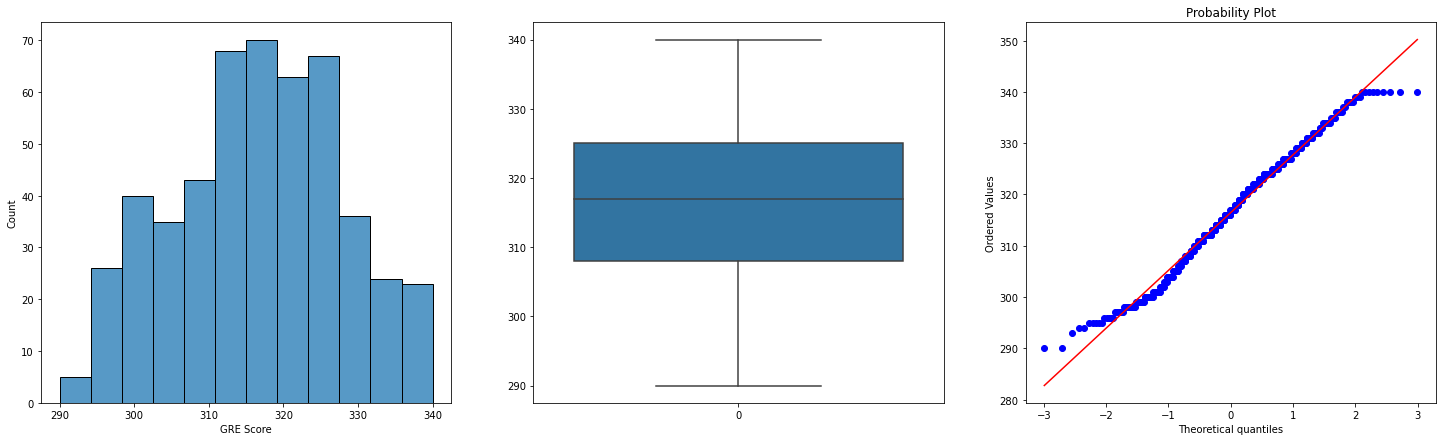

In [173]:
plt.figure(figsize=(25,7))

plt.subplot(131)
sns.histplot(df["GRE Score"]) 

plt.subplot(132)
sns.boxplot(data=df["GRE Score"])

# QQPLOT TO CHECK IF THE DISTRIBUTION IS GAUSSIAN
plt.subplot(133)
prob=stats.probplot(df["GRE Score"],dist="norm", plot=pylab)

plt.show()

### Observations:

###### 1.We can see that GRE Score is approximately Normally distributed.
###### 2. GRE Score does not have any outliers

### TOEFL Score

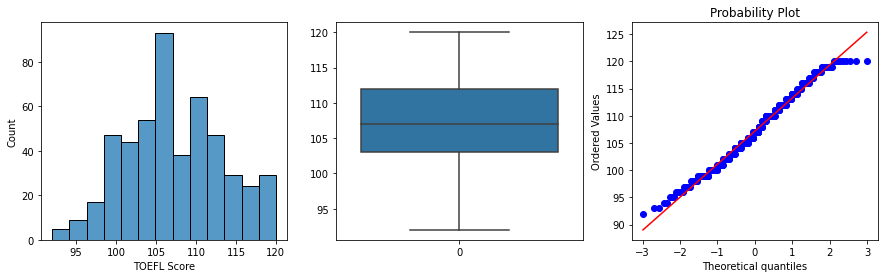

In [174]:
plt.figure(figsize=(15,4))

plt.subplot(131)
sns.histplot(df["TOEFL Score"])

plt.subplot(132)
sns.boxplot(data=df["TOEFL Score"])

# QQPLOT TO CHECK IF THE DISTRIBUTION IS GAUSSIAN
plt.subplot(133)
prob=stats.probplot(df["TOEFL Score"],dist="norm", plot=pylab)

plt.show()

### Observations:

###### 1.We can see that TOEFL Score is approximately Normally distributed.
###### 2. TOEFL Score does not have any outliers

### University Rating

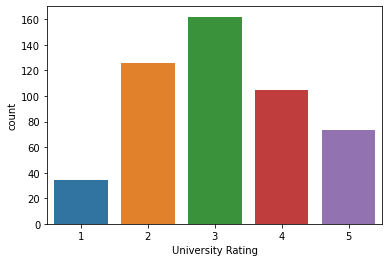

In [175]:
sns.countplot(data=df, x ="University Rating")
plt.show()

#### Observations:
 
We can see that the university Rating is a cataegorical attribute. University Rating = 3 is the most frequent and University Rating = 1 is the least frequent

### SOP

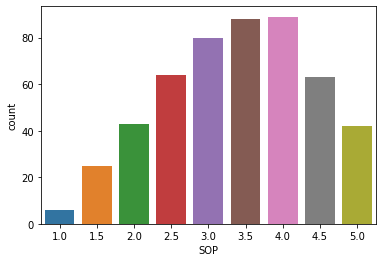

In [176]:
sns.countplot(data=df, x = "SOP")
plt.show()

### Observation:

We can see that SOP is a cataegorical attribute. SOP = around 3.5-4 is the most frequent and University Rating around 1 is the least frequent.

### LOR

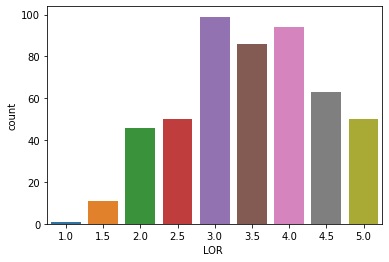

In [177]:
sns.countplot(data=df, x = "LOR ")
plt.show()

## CGPA

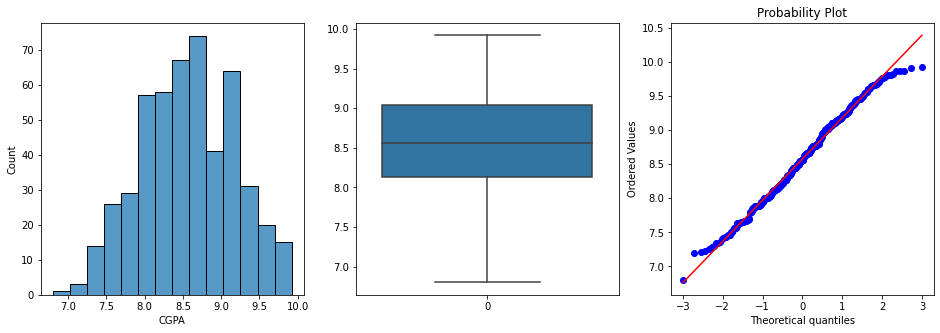

In [178]:
plt.figure(figsize=(16,5)) 

plt.subplot(131)
sns.histplot(df["CGPA"])

plt.subplot(132)
sns.boxplot(data=df["CGPA"])

# QQPLOT TO CHECK IF THE DISTRIBUTION IS GAUSSIAN
plt.subplot(133)
prob=stats.probplot(df["CGPA"],dist="norm", plot=pylab)

plt.show()

### Observations:

###### 1.We can see that CGPA  is approximately Normally distributed.
###### 2. CGPA does not have any outliers

### Research 

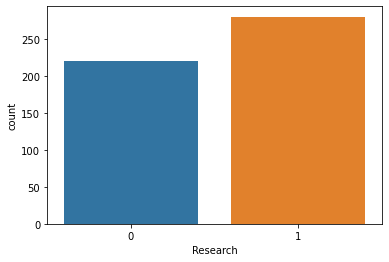

In [179]:
sns.countplot(data=df, x = "Research")
plt.show()

##### Observation:
###### we can see that Research is a cataegorical attribute. Research = 1 is more frequent than Research =0

In [180]:
num_features = df.select_dtypes('number')
num_features.columns
     

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

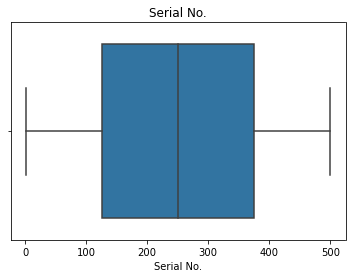

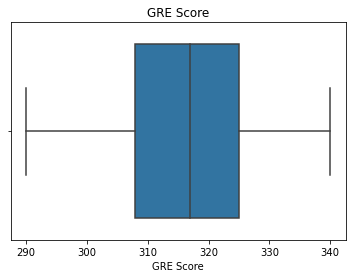

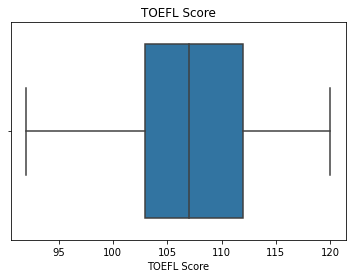

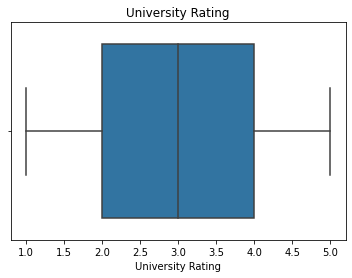

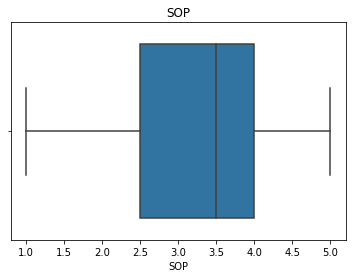

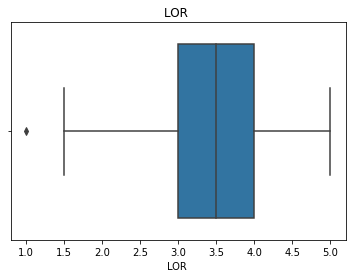

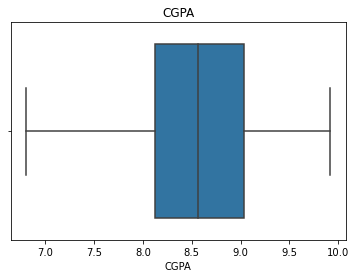

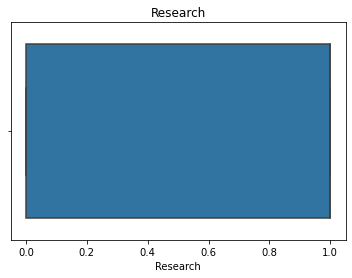

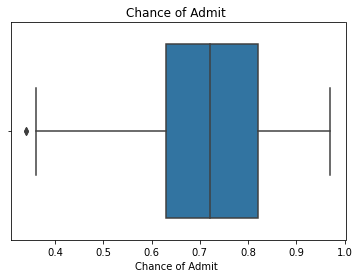

In [181]:
# Check for outliers
for col in df.columns:
  p = sns.boxplot(data=df, x=col)
  p.set(title=f'{col}')
  plt.show()


### Bivariate Analysis
#### Distribution of continuous features for various University Rankings

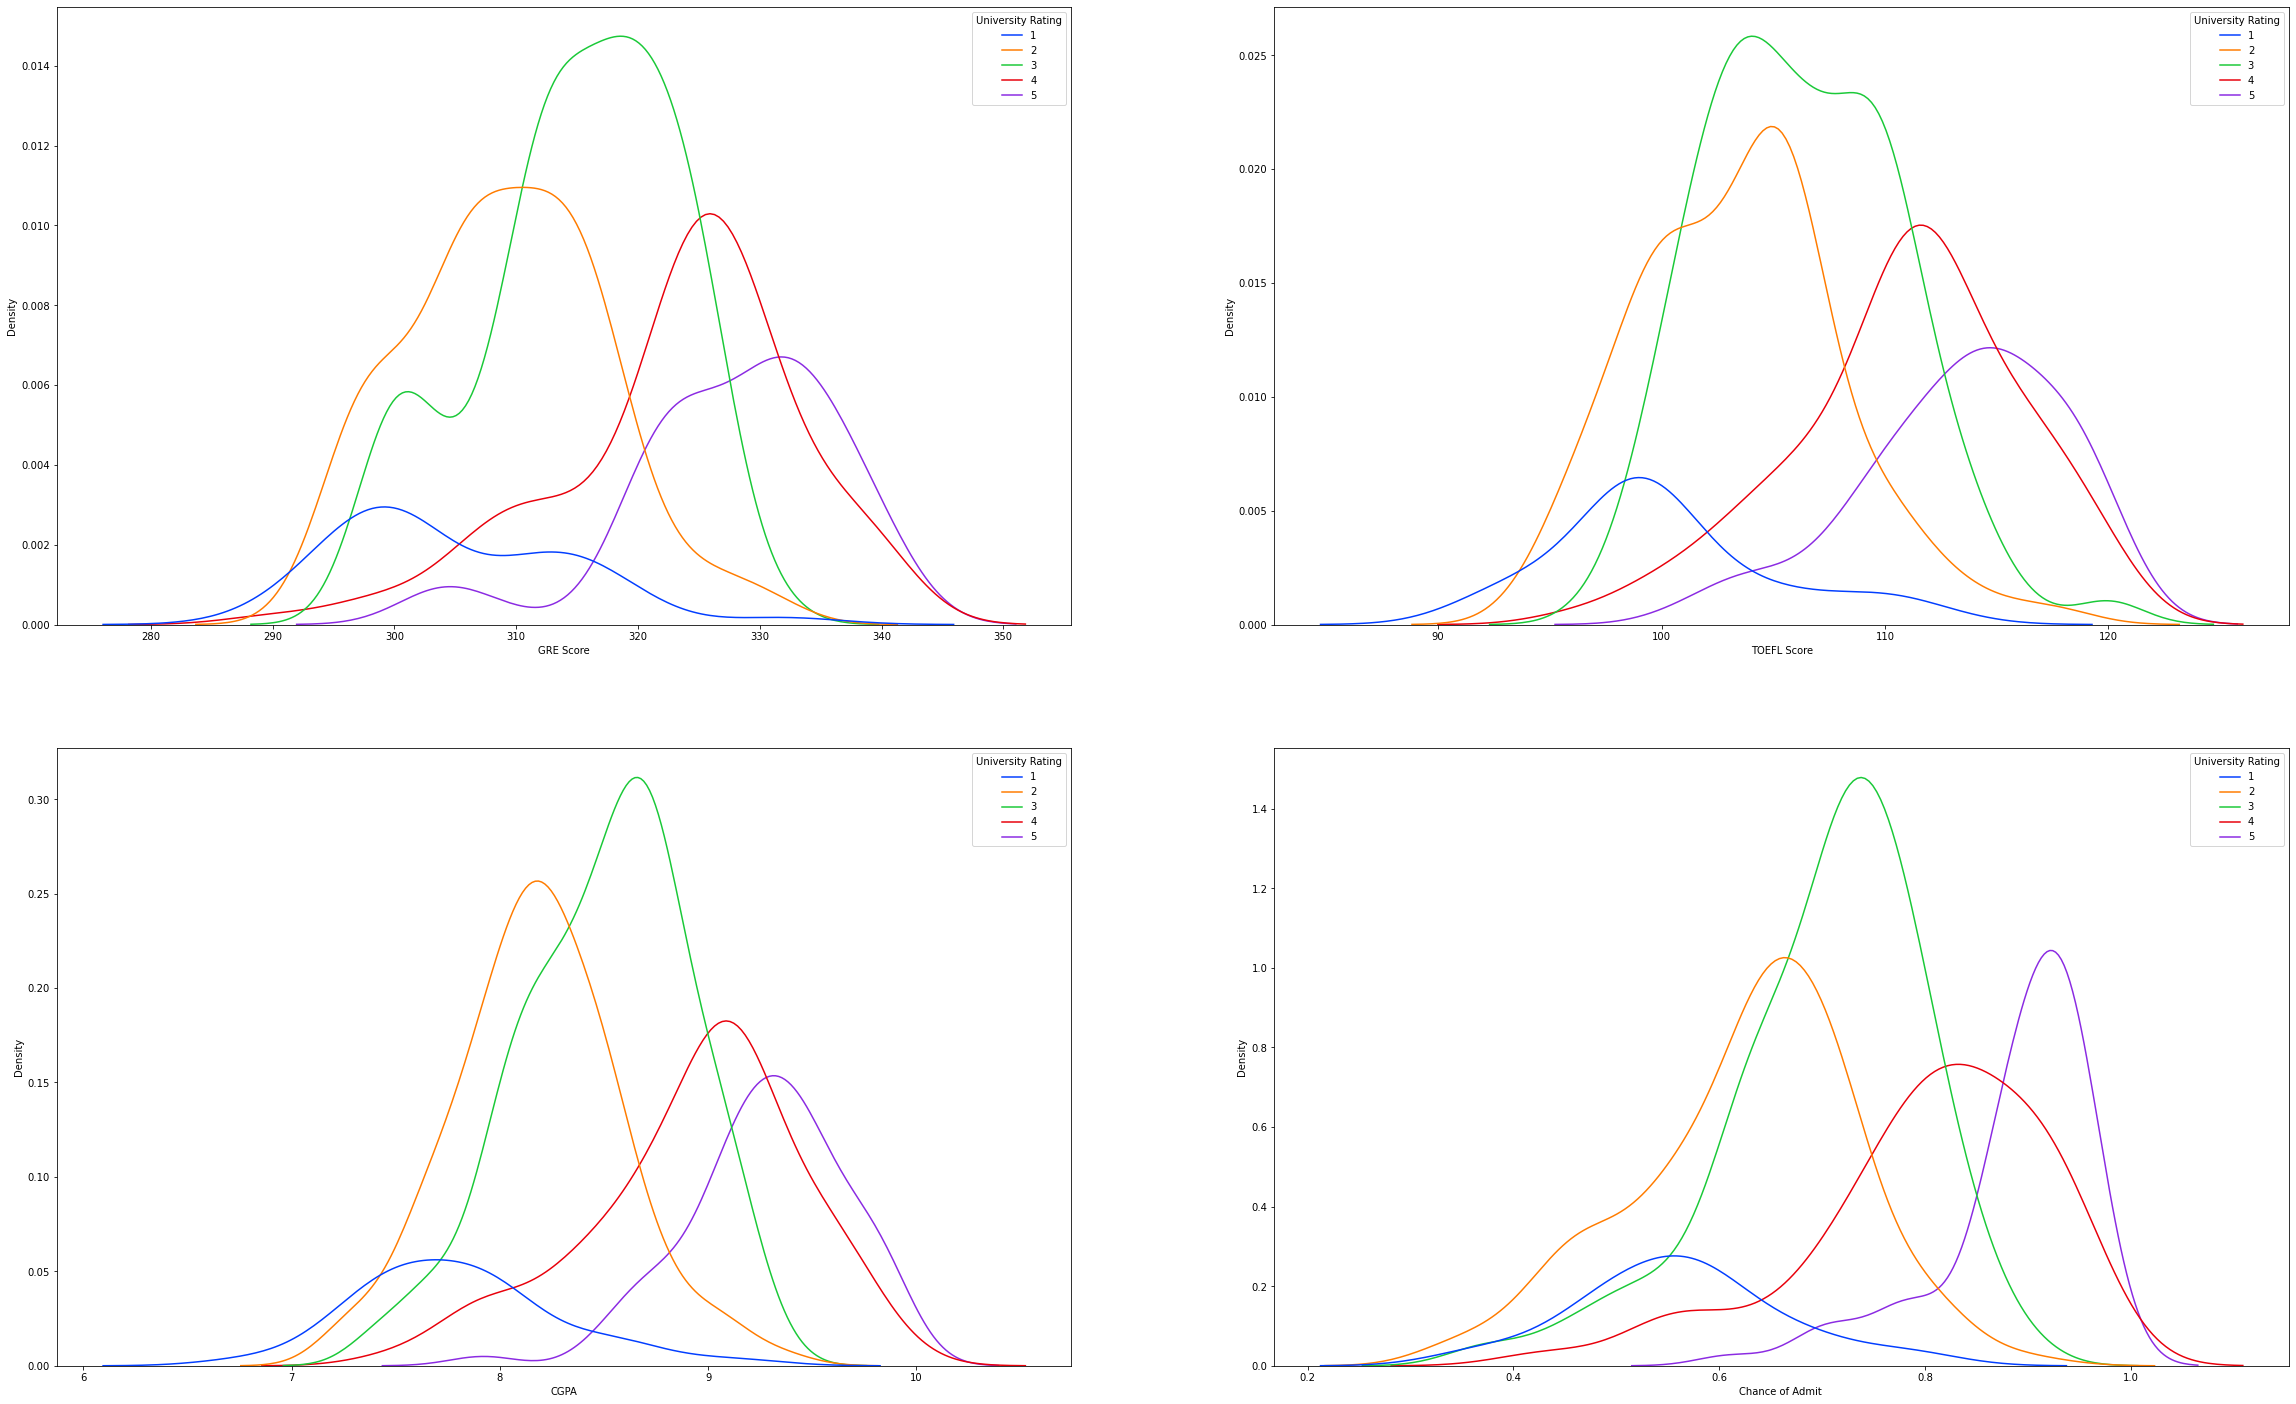

In [182]:
plt.figure(figsize=(40,25))

plt.subplot(221)
sns.kdeplot(df["GRE Score"], hue=df["University Rating"],palette="bright") 

plt.subplot(222)
sns.kdeplot(df["TOEFL Score"], hue=df["University Rating"],palette="bright")

plt.subplot(223)
sns.kdeplot(df["CGPA"], hue=df["University Rating"],palette="bright")

plt.subplot(224)
sns.kdeplot(df["Chance of Admit "], hue=df["University Rating"], palette="bright")

plt.show()

###### Observations:  We can see that students with Research=1 tend to have GRE Scores,TOEFL Scores,CGPA, Chance of Admit on the higher side where as students with Research=0 tend to have GRE Scores, TOEFL Scores, CGPA, Chance of Admit on the lower side

#### SOP vs GRE Score

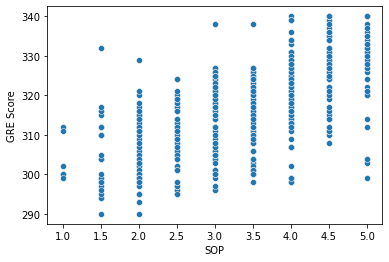

In [183]:
sns.scatterplot(data=df, x='SOP',y ='GRE Score')
plt.show()


###### Observations: \ Students with lower scores in SOP tend to have lower GRE Scores while Students with higher scores in SOP tend to have higher GRE Scores.


#### LOR vs GRE Score

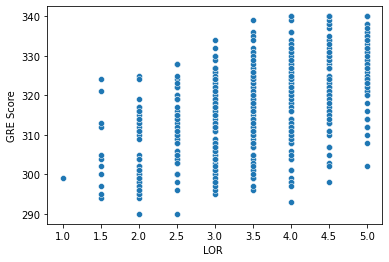

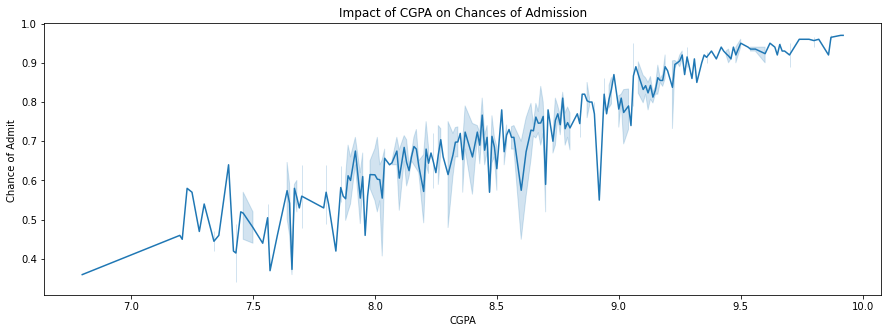

In [184]:
sns.scatterplot(data=df, x='LOR ',y='GRE Score')
plt.figure(figsize=(15, 5))

sns.lineplot(x='CGPA', y='Chance of Admit ', data=df)
# sns.scatterplot(data=work_df, x='CGPA', y='Chance of Admit ', hue='CGPA')
plt.title("Impact of CGPA on Chances of Admission")
plt.show()
     
plt.show()

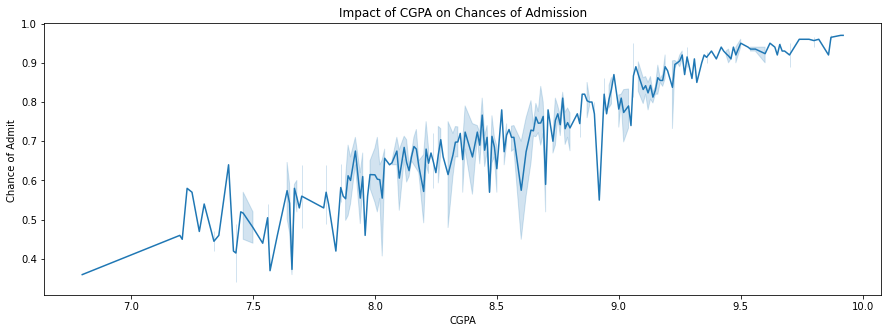

In [185]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='CGPA', y='Chance of Admit ', data=df)
# sns.scatterplot(data=work_df, x='CGPA', y='Chance of Admit ', hue='CGPA')
plt.title("Impact of CGPA on Chances of Admission")
plt.show()
     

###### Observations: \ Students with lower scores in LOR tend to have lower GRE Scores while Students with higher scores in LOR tend to have higher GRE Scores.
###### It is evident that higher the scores of CGPA, GRE and TOEFL, more the opportunity of getting admission

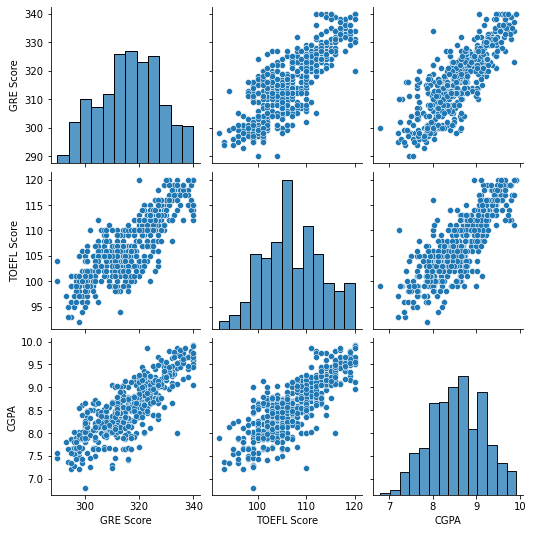

In [186]:
sns.pairplot(df[['GRE Score','TOEFL Score','CGPA']], kind='scatter')
plt.show()

##### Observations: 
###### 1. GRE Score increases with TOEFL Score.
###### 2. GRE Score increases with CGPA.
###### 3. TOEFL Score increases with CGPA.

## Correalations between the continuous attributes

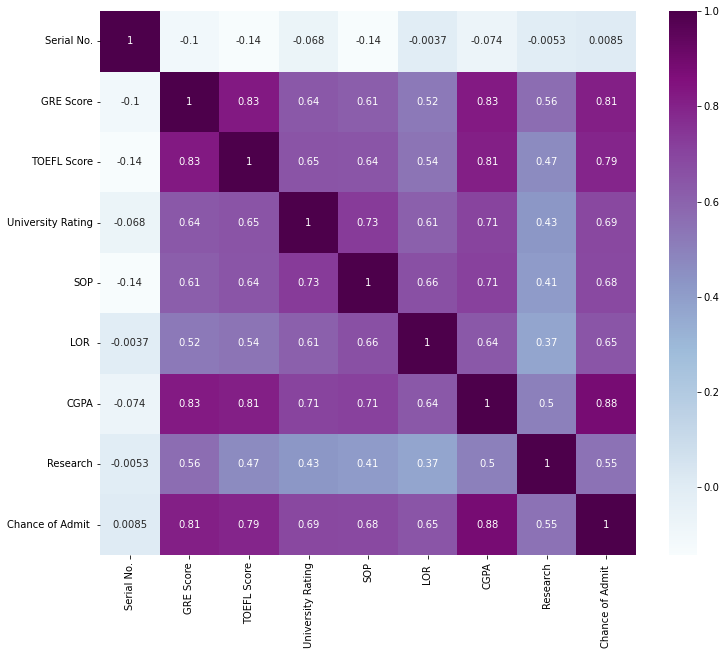

In [187]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap = "BuPu")

plt.show()

#### Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research
#### Target/Dependent Variable : Chance of Admit (the value we want to predict)
###### Observations: 
1. TOEFL Score is highly positively correlated with GRE Score. 
2. CGPA is highly positively correlated with GRE Score and TOEFL Score. 
3. There is very less correlation of LOR with GRE Score, TOEFL Score.
4. from above correlation heatmap , we can observe GRE score TOEFL score and CGPA have very high correlation with      Chance of admission. 
5. University rating, SOP ,LOR and Research have comparatively slightly less correlated than other features.


## Applying Linear Regression
### Data Preprocessing

In [188]:
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

# Dropping the Serial number and the dependent feature
X = df[df.columns.drop(['Serial No.','Chance of Admit '])]
Y = df["Chance of Admit "]

# Lets scale the data, standardization
sc = StandardScaler()
cols = X.columns
X[cols] = sc.fit_transform(X[cols])

### Splitting the data into Training- data and test - data

In [189]:
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size= 0.6, random_state = 42)


### Applying Linear regression on Statsmodel library

In [190]:
# Statdmodels implementation of Linear regression
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm).fit()

### Model Interpretibility and Feature Importance

In [191]:
print("Parameters: ", sm_model.params)

Parameters:  const                0.723293
GRE Score            0.023473
TOEFL Score          0.017443
University Rating    0.003759
SOP                  0.007755
LOR                  0.012560
CGPA                 0.072856
Research             0.006602
dtype: float64


## Checking the assumptions for Linear Regression.
#### 1. Checking for Multicollinearity using VIF

In [192]:
import warnings 
warnings.filterwarnings('ignore')

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X

vif['Features'] = X_t.columns

vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False) 
vif

,Features,VIF
5,CGPA,4.78
0,GRE Score,4.46
1,TOEFL Score,3.90
3,SOP,2.84
2,University Rating,2.62
4,LOR,2.03
6,Research,1.49


##### Observation:\ The VIF score of all features are less than 5. It means that multicollinearity among the features is present but not very high. So we don't need to drop any feature. Thus, this assumption is satisfied.

### 2. Mean of residuals

In [193]:
y_pred_train = sm_model.predict(X_train_sm)

In [194]:
errors = y_pred_train - y_train

In [195]:
def mean_of_residuals(errors):
    sum=0
    for i in errors: 
        if i>0:
            sum +=i 
        else:
            sum -=i
    return sum/len(errors)
print("Mean of residuals=",mean_of_residuals(errors))

Mean of residuals= 0.04105711936532064


##### Observation:\ Mean of the residuals is close to zero. Thus, this assumption is satisfied.

#### Linearity of variables( no pattern in residual plot)

###### Chance of Admit v/s GRE Score

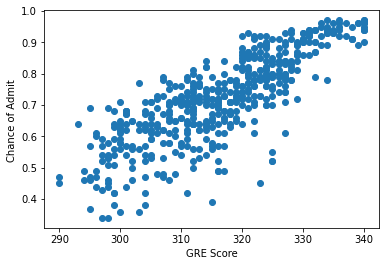

In [196]:
plt.scatter(df["GRE Score"],df["Chance of Admit "])
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit ")
plt.show()

##### Observation:\ We can see that Chance of Admit varies     roughly linearly with GRE Score.

##### Chance of Admit v/s TOEFL Score

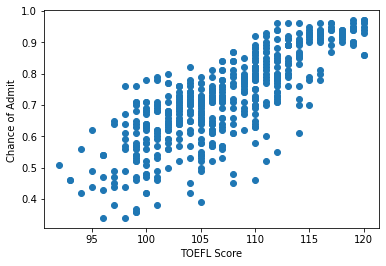

In [197]:
plt.scatter(df["TOEFL Score"],df["Chance of Admit "]) 
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit ")
plt.show()

##### Observation:\ We can see that Chance of Admit varies roughly linearly with TOEFL Score. CGPA v/s Chance of Admit

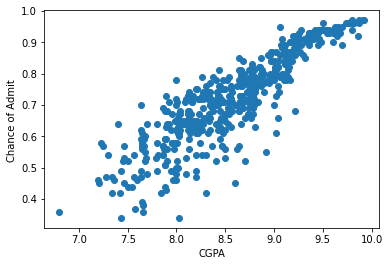

In [198]:
plt.scatter(df["CGPA"],df["Chance of Admit "])
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit ")
plt.show()

##### Observation:\ We can see that Chance of Admit varies roughly linearly with CGPA Score.

### 4. Residual Plot for Homoskedasticity

Text(0.5, 1.0, 'Chance of Admit vs Residuals')

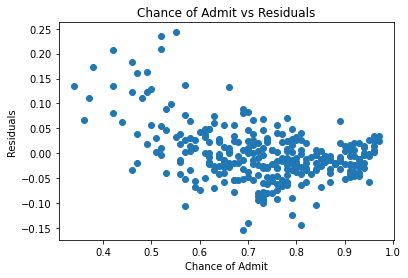

In [199]:
plt.scatter(y_train,errors) 
plt.xlabel("Chance of Admit")
plt.ylabel("Residuals")
plt.title("Chance of Admit vs Residuals")

###### Performing the Goldfeld Quandt test to check if the Homoscedasticity is present or not
Null Hypothesis : Homoscedasticity is present\Alternate     Hypothesis : Homoscedasticity is not present

In [200]:
result=sm.stats.diagnostic.het_goldfeldquandt(y_train, X_train)
print("p-value= ", result[1])
if result[1]>0.05:
    print("Homoscedasticity is present") 
else:
    print("Homoscedasticity is not present")

p-value=  0.5171499007585023
Homoscedasticity is present


##### Observation:\ By the test results, we can conclude that Homoscedasticity is present.

### 5. Checking Normality of residuals

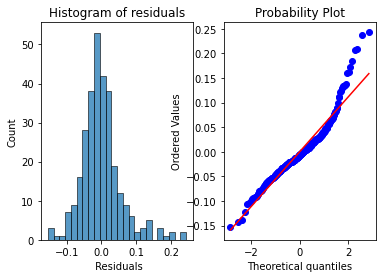

In [201]:
import seaborn as sns

plt.subplot(121) 
sns.histplot(errors)

plt.xlabel(" Residuals") 
plt.title("Histogram of residuals")

# QQPLOT TO CHECK IF THE DISTRIBUTION IS GAUSSIAN
plt.subplot(122) 
prob=stats.probplot(errors,dist="norm", plot=pylab)

###### Observation:\ We can see that the residuals roughly follow a Gaussian Distribution. Thus, this assumption is also satisfied.

## Model Performance Evaluation

In [202]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     199.9
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          2.05e-107
Time:                        14:59:40   Log-Likelihood:                 429.56
No. Observations:                 300   AIC:                            -843.1
Df Residuals:                     292   BIC:                            -813.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7233      0.00

### R^2 Score

In [203]:
import warnings
warnings.filterwarnings('ignore')
def r2_score(Y,Y_hat):
    num = np.sum((Y-Y_hat)**2)
    denom = np.sum((Y- Y.mean())**2) 
    score = (1 - num/denom)
    return score

X_test_sm = sm.add_constant(X_test) #Statmodels default is without intercept, to add i
y_pred_test=sm_model.predict(X_test_sm)

print("R2 score (train data) = ",r2_score(y_train,y_pred_train))
print("R2 score (test data) = ",r2_score(y_test,y_pred_test))

R2 score (train data) =  0.8273861931402555
R2 score (test data) =  0.8062296525803441


### Adjusted R^2 Score

In [207]:
Adj_R_train = 1 - (1-r2_score(y_train,y_pred_train))*(len(y_train)-1)/(len(y_train)-X_train_sm)
print("Adjusted R2 (train) = ",Adj_R_train)
Adj_R_test = 1 - (1-r2_score(y_test,y_pred_test))*(len(y_test)-1)/(len(y_test)-X_test_sm )
print("Adjusted R2 (test) = ",Adj_R_test)

Adjusted R2 (train) =          const  GRE Score  TOEFL Score  University Rating       SOP      LOR   \
467  0.827386   0.827884     0.828544           0.827010  0.827889  0.827016   
83   0.827386   0.827680     0.827221           0.827010  0.827598  0.827329   
245  0.827386   0.827374     0.827696           0.827516  0.827598  0.828570   
165  0.827386   0.827680     0.827696           0.827010  0.827307  0.827641   
163  0.827386   0.827935     0.828168           0.828019  0.827889  0.828261   
..        ...        ...          ...                ...       ...       ...   
106  0.827386   0.827323     0.827601           0.827516  0.827307  0.827329   
270  0.827386   0.828492     0.828168           0.828519  0.828466  0.828261   
348  0.827386   0.828694     0.828731           0.829016  0.828754  0.828877   
435  0.827386   0.828340     0.828168           0.828519  0.828466  0.827641   
102  0.827386   0.828087     0.828074           0.828519  0.827598  0.827952   

         CGPA  R

###### Adjusted R2 (train) =  0.8088698759241166
###### Adjusted R2 (test) =  0.8262425018387725

## Root Mean Square Error

In [208]:
RMSE=np.sqrt(np.mean((y_pred_train-y_train)**2)) 
print("Root Mean Square Error (Train)= ", RMSE)

RMSE_test=np.sqrt(np.mean((y_pred_test-y_test)**2))
print("Root Mean Square Error (Test)= ", RMSE_test)

Root Mean Square Error (Train)=  0.057798073083437713
Root Mean Square Error (Test)=  0.06280328867508017


## Mean Absolute Error

In [211]:
MAE=np.mean(abs(y_pred_train-y_train))
print("Mean Absolute Error (Train) = ", MAE)

MAE_test=np.mean(abs(y_pred_test-y_test)) 
print("Mean Absolute Error (Test) = ", MAE_test)

Mean Absolute Error (Train) =  0.04105711936532064
Mean Absolute Error (Test) =  0.04492147888512787


### Observations:
###### 1. We can see that for both training data, test data is around 0.82. Thus, it is close to 1/2. We can see that for both training data, test data is around 0.81. Thus, it is close to 1/3. We can see that RMSE for both training data, test data is around 0.06. Thus, it is close to zero.\ 4. We can see that MAE for both training data, test data is around 0.04. Thus, it is close to zero.
###### From these performance metrics, we can conclude that the Linear Regression Model is performing pretty well.


## Regularization


### Lasso Regression

In [216]:
from sklearn import linear_model 
import numpy
alphas = numpy.linspace(0.00,0.03,20) 
scores_train=[]
scores_test=[] 
for alp in alphas:
    l1_reg = linear_model.Lasso(alp) 
    l1_reg.fit(X_train,y_train) 
    scores_train.append(l1_reg.score(X_train,y_train))
    scores_test.append(l1_reg.score(X_test,y_test))


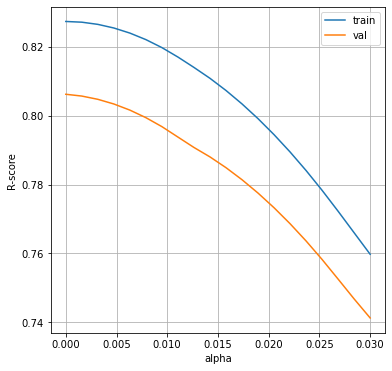

In [217]:
plt.figure(figsize=(6,6))
plt.plot(alphas, scores_train, label="train") 
plt.plot(alphas, scores_test, label="val") 
plt.legend()
plt.xlabel("alpha")
plt.ylabel("R-score")
plt.grid()
plt.show()

### Ridge Regression

In [219]:
from sklearn import linear_model
import numpy
alphas = numpy.linspace(0,100,1000) 
scores_train=[]
scores_test=[] 
for alp in alphas:
    l2_reg = linear_model.Ridge(alp)
    l2_reg.fit(X_train,y_train)
    scores_train.append(l2_reg.score(X_train,y_train)) 
    scores_test.append(l2_reg.score(X_test,y_test))


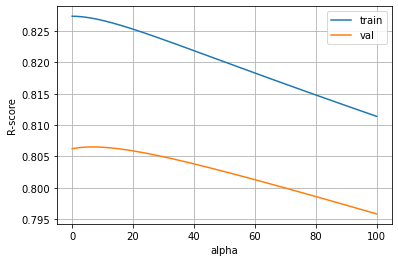

In [220]:
plt.figure()
plt.plot(alphas, scores_train, label="train") 
plt.plot(alphas, scores_test, label="val")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("R-score")
plt.grid()
plt.show()

### Comments on significance of predictor variables

In [221]:
print("Parameters: ", sm_model.params)

Parameters:  const                0.723293
GRE Score            0.023473
TOEFL Score          0.017443
University Rating    0.003759
SOP                  0.007755
LOR                  0.012560
CGPA                 0.072856
Research             0.006602
dtype: float64


##### Observations:\ 1. We can see that all the coefficients are positive. This means that increase in any of them, will increase the Chance of Admit.
##### 2. CGPA, TOEFL Scores are the most important factor for determining Chance of Admit where a SOP is the least important.

### Comments on additional data sources for model improvement, model implementation in real world, potential business benefits from improving the model

#### 1. We know that CGPA is the most important factor for determining the Chance of Admit. So if we improve the data of CGPA, by collecting semester-wise SGPA, then our model might improve.\ 2. If we also collect data for University Ranking of the University to be applied for, then our model might improve.\ 3. By improving the model, we might be able to suggest students to the universities where the chances of getting admissio are the highest. Thus, saving their money, effort.